# Q1 Autoencoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 102s 2ms/sample - loss: 46.3346 - val_loss: 41.0652
Epoch 2/10
60000/60000 [==============================] - 101s 2ms/sample - loss: 40.7402 - val_loss: 39.4072
Epoch 3/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 39.3391 - val_loss: 38.4750
Epoch 4/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 38.6468 - val_loss: 38.1197
Epoch 5/10
60000/60000 [==============================] - 106s 2ms/sample - loss: 38.1755 - val_loss: 37.8433
Epoch 6/10
60000/60000 [==============================] - 103s 2ms/sample - loss: 37.8706 - val_loss: 37.3622
Epoch 7/10
60000/60000 [==============================] - 100s 2ms/sample - loss: 37.6473 - val_loss: 37.3226
Epoch 8/10
60000/60000 [==============================] - 101s 2ms/sample - loss: 37.3758 - val_loss: 37.0691
Epoch 9/10
60000/60000 [==============================] - 105s 2ms/sam

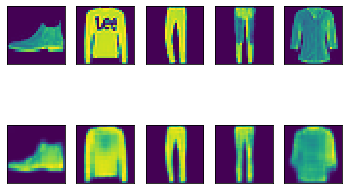

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

mnist = keras.datasets.fashion_mnist
(x_train, _), (x_test, _) = mnist.load_data()
model = keras.Sequential()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  


model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu',  padding='same',strides=(1,1), input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2), padding='same'))
model.add(keras.layers.Conv2D(filters=8, kernel_size=(5,5), activation='relu',  padding='same',strides=(1,1)))
model.add(keras.layers.MaxPooling2D((2,2), padding='same'))
model.add(keras.layers.Conv2D(filters=8, kernel_size=(5,5), activation='relu',  padding='same',strides=(1,1)))
model.add(keras.layers.MaxPooling2D((2,2), padding='same'))

model.add(keras.layers.Conv2D(filters=8, kernel_size= (3,3), activation= 'relu', padding='same',strides=(1,1)))
model.add(keras.layers.UpSampling2D((2,2)))
model.add(keras.layers.Conv2D(filters=8, kernel_size= (3,3), activation= 'relu', padding='same',strides=(1,1)))
model.add(keras.layers.UpSampling2D((2,2)))
model.add(keras.layers.Conv2D(filters=16, kernel_size= (3,3), activation= 'relu',strides=(1,1)))
model.add(keras.layers.UpSampling2D((2,2)))
model.add(keras.layers.Conv2D(filters=1, kernel_size= (3,3), activation= 'sigmoid', padding='same'))
model.compile(optimizer='adadelta', loss='binary_crossentropy')
model.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test), shuffle=True)

decoded = model.predict(x_test)


n = 5
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Q2 CNN


## 2.1 Deep CNN



In [9]:
from tensorflow.python.keras.utils import to_categorical
mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
model = keras.Sequential()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)




model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.6001 - acc: 0.7759 - val_loss: 0.3956 - val_acc: 0.8526
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.4000 - acc: 0.8543 - val_loss: 0.3225 - val_acc: 0.8826
Epoch 3/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.3554 - acc: 0.8695 - val_loss: 0.3035 - val_acc: 0.8882
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.3300 - acc: 0.8792 - val_loss: 0.2936 - val_acc: 0.8908
Epoch 5/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.3155 - acc: 0.8857 - val_loss: 0.2881 - val_acc: 0.8909
Epoch 6/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.3022 - acc: 0.8887 - val_loss: 0.2751 - val_acc: 0.8968
Epoch 7/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2932 - acc: 0.8909 - val_loss: 0.

## 2.2 Transfer Learning

In [6]:
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import Dense, GlobalAveragePooling2D,ZeroPadding2D,Flatten
from tensorflow.python.keras.models import Model
import numpy as np

mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.stack((x_train, )*3, axis=-1)
x_test = np.stack((x_test, )*3, axis=-1)

input_tensor = Input(shape=(28, 28, 3))
input_tensor = ZeroPadding2D(padding = (2, 2))(input_tensor)

base_model = VGG16(input_tensor=input_tensor ,include_top=False, weights='imagenet', input_shape=(32, 32, 3))
for layer in base_model.layers:
	layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)
model = Model(base_model.input, prediction)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)





Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 416s 7ms/sample - loss: 0.6833 - acc: 0.7642 - val_loss: 0.4876 - val_acc: 0.8215
Epoch 2/5
60000/60000 [==============================] - 433s 7ms/sample - loss: 0.4513 - acc: 0.8339 - val_loss: 0.4379 - val_acc: 0.8409
Epoch 3/5
60000/60000 [==============================] - 429s 7ms/sample - loss: 0.4109 - acc: 0.8495 - val_loss: 0.4166 - val_acc: 0.8476
Epoch 4/5
60000/60000 [==============================] - 435s 7ms/sample - loss: 0.3862 - acc: 0.8585 - val_loss: 0.4001 - val_acc: 0.8532
Epoch 5/5
60000/60000 [==============================] - 436s 7ms/sample - loss: 0.3731 - acc: 0.8621 - val_loss: 0.4028 - val_acc: 0.8508


# Q3 Text Classification

I write the answer of Q3 in a seperate notebook and I cannot merge the two notebooks together.
See:https://github.com/rivenseiun/ANLY-590-Homework/blob/master/ANLY-590%20HW3_2.ipynb